In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import dill as pickle

In [5]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.convolutional_neural_network_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=12, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.linear_layers = nn.Sequential(
            nn.Linear(24 * 7 * 7, out_features=64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(in_features=64, out_features=10)
        )
    def forward(self, x):
        x = self.convolutional_neural_network_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        x = F.log_softmax(x, dim=1)
        return x

In [6]:
model = torch.load("Torch_cnn_model.pkl",map_location=torch.device('cpu'))
# model = pickle.load(open("model.pkl",'rb'))

In [7]:
image_path = 'images/5.jpeg'
image = Image.open(image_path)

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1,), (0.3,))
])

In [9]:
img_tranform = transform(image)

In [10]:
img = img_tranform
img = img.view(-1,1,28,28)
with torch.no_grad():
    logits = model.forward(img)

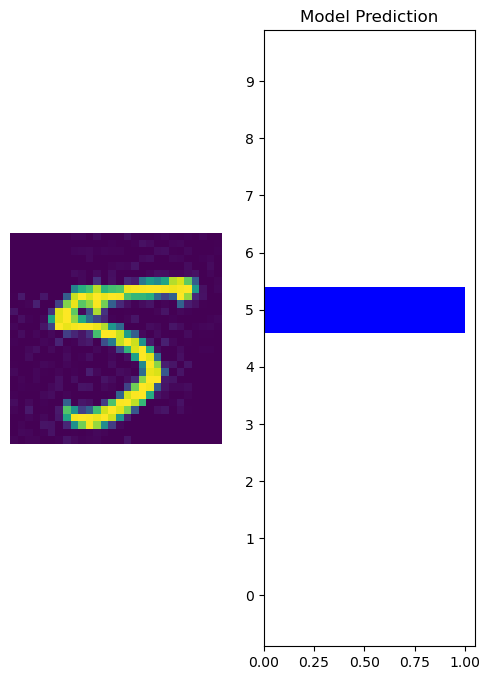

In [11]:
probabilities = F.softmax(logits, dim =1).detach().cpu().numpy().squeeze()
fig, (ax1, ax2) = plt.subplots(figsize = (6,8), ncols= 2)
ax1.imshow(img.view(1, 28, 28).detach().cpu().numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10), probabilities, color='b')
ax2.set_yticks(np.arange(10))
ax2.set_title('Model Prediction')
plt.show()

In [20]:
np.where(probabilities == probabilities.max())[0][0]

5